In [4]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
 
 
   
# Driver code
if __name__ == "__main__" :
 
    print("\n2nd Statement :")
    sentence = "god is bad"
    sentiment_scores(sentence)
 


2nd Statement :
Overall sentiment dictionary is :  {'neg': 0.53, 'neu': 0.152, 'pos': 0.318, 'compound': -0.34}
sentence was rated as  53.0 % Negative
sentence was rated as  15.2 % Neutral
sentence was rated as  31.8 % Positive
Sentence Overall Rated As Negative


In [1]:
import openai

# Use the GPT-3 model
openai.api_key = "OpenAI API Key"
model_engine = "text-davinci-002"

def generate_text(prompt):
    completions = openai.Completion.create(
        engine=model_engine,
        prompt=prompt,
        max_tokens=1000,
        n=1,
        stop=None,
        temperature=0.5,
    )

    message = completions.choices[0].text
    return message

descriptions = 'A little girl is sitting in front of a large painted rainbow .'

generated_text = generate_text("Create 10 funny caption for a new meme. The background picture is" + descriptions)
print(generated_text)



1. "I'm not sure what's more impressive, the rainbow or my art skills."

2. "I'm pretty sure I can taste the rainbow."

3. "This is what happiness looks like."

4. "I'm gonna make a wish on this rainbow."

5. "I'm not sure what's more beautiful, the rainbow or me."

6. "I'm the pot of gold at the end of this rainbow."

7. "I'm the only one who can see this rainbow."

8. "I'm gonna catch this rainbow."

9. "Is this what heaven looks like?"

10. "I found the end of the rainbow!"


In [2]:
def drawTextWithOutline(text, x, y):
    draw.text((x-2, y-2), text,(0,0,0),font=font)
    draw.text((x+2, y-2), text,(0,0,0),font=font)
    draw.text((x+2, y+2), text,(0,0,0),font=font)
    draw.text((x-2, y+2), text,(0,0,0),font=font)
    draw.text((x, y), text, (255,255,255), font=font)
    return

def drawText(text, pos):
    text = text.upper()
    w, h = draw.textsize(text, font) # measure the size the text will take

    lineCount = 1
    if w > img.width:
        lineCount = int(round((w / img.width) + 1))

    lines = []
    if lineCount > 1:

        lastCut = 0
        isLast = False
        for i in range(0,lineCount):
            if lastCut == 0:
                cut = int((len(text) / lineCount) * i + 0.5)
            else:
                cut = lastCut

            if i < lineCount-1:
                nextCut = int((len(text) / lineCount) * (i+1) + 0.5)
            else:
                nextCut = len(text)
                isLast = True

            # make sure we don't cut words in half
            if not (nextCut == len(text) or text[nextCut] == " "):
                while text[nextCut] != " ":
                    nextCut += 1

            line = text[cut:nextCut].strip()

            # is line still fitting ?
            w, h = draw.textsize(line, font)
            if not isLast and w > img.width:
                nextCut -= 1
                while text[nextCut] != " ":
                    nextCut -= 1

            lastCut = nextCut
            lines.append(text[cut:nextCut].strip())
    else:
        lines.append(text)

    lastY = -h
    if pos == "bottom":
        lastY = img.height - h * (lineCount+1) - 10

    for i in range(0, lineCount):
        w, h = draw.textsize(lines[i], font)
        x = img.width/2 - w/2
        y = lastY + h
        drawTextWithOutline(lines[i], x, y)
        lastY = y

def display_image_in_actual_size(im_path, dpi):
  im_data = plt.imread(im_path)
  height, width, depth = im_data.shape
  figsize = width / float(dpi), height / float(dpi)
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])
  ax.axis('off')
  ax.imshow(im_data)
  plt.show()


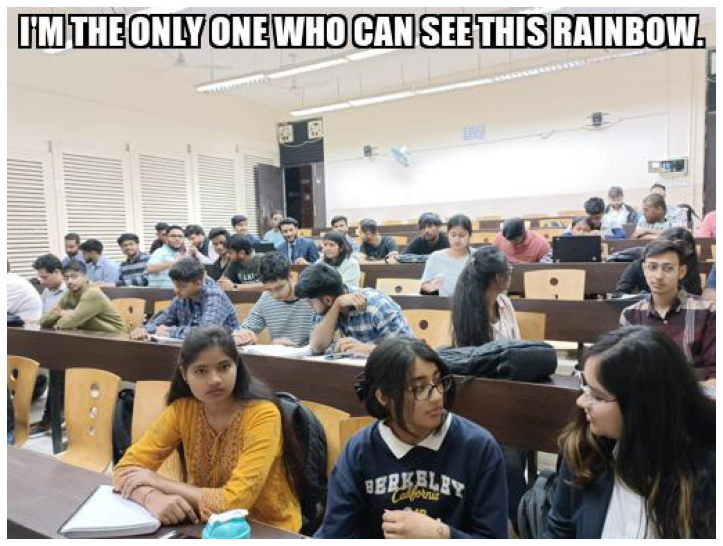

In [5]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import matplotlib.pyplot as plt


# from https://blog.lipsumarium.com/caption-memes-in-python/
# text_query = 'panda'
choose_caption = "I'm the only one who can see this rainbow."
# choose_caption2 = "and you're like 'What class?"
font_size= 27 #@param {type:"slider", min:20, max:60, step:2}
position = "top" #@param ["top", "bottom"]
# position2 = "bottom" #@param ["top", "bottom"]
# image_id = annotations[text_indices[image_indices[0]]][0]
# parts = image_id.split("/")

# file_name = all_image_metadata[image_indices[choose_image-1]][1]
# choose_image = '/content/WhatsApp Image 2023-01-31 at 9.51.43 PM.jpeg'
img = Image.open(r'C:\Users\Rishab Jain\Downloads\WhatsApp Image 2023-03-29 at 12.38.05 AM.jpeg')
w, h = img.size
if (w > h):
  new_w = 512.0
  new_h = round(new_w * h / w)
else:
  new_h = 512.0
  new_w = round(new_h * w / h)
img = img.resize((int(new_w+0.5), int(new_h+0.5)))
img = img.convert(mode="RGB")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("impact.ttf", font_size)
drawText(choose_caption, position)
# drawText(choose_caption2, position2)
# print(x)
# output_filename = "AI-Memer_" + text_query.replace(" ", "_")
# output_filename += "_" + str(choose_image) + "_" + str(choose_caption) + ".jpg"
img.save(r'C:\Users\Rishab Jain\OneDrive\Pictures\out.jpg')
display_image_in_actual_size(r'C:\Users\Rishab Jain\OneDrive\Pictures\out.jpg', 52)
# author = all_image_metadata[image_indices[choose_image-1]][3]
# print("Meme by AI-Memer, Image by " + 'rishabh' + ", Caption by " + ai_engine + ", License: CC BY-SA 4.0")